In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!head -n 235 UpdatedResumeDataSet.csv

head: cannot open 'UpdatedResumeDataSet.csv' for reading: No such file or directory


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv("/content/drive/MyDrive/UpdatedResumeDataSet (1).csv")

In [12]:
df.shape

(962, 2)

In [13]:
df.Category

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [14]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [15]:
df.columns

Index(['Category', 'Resume'], dtype='object')

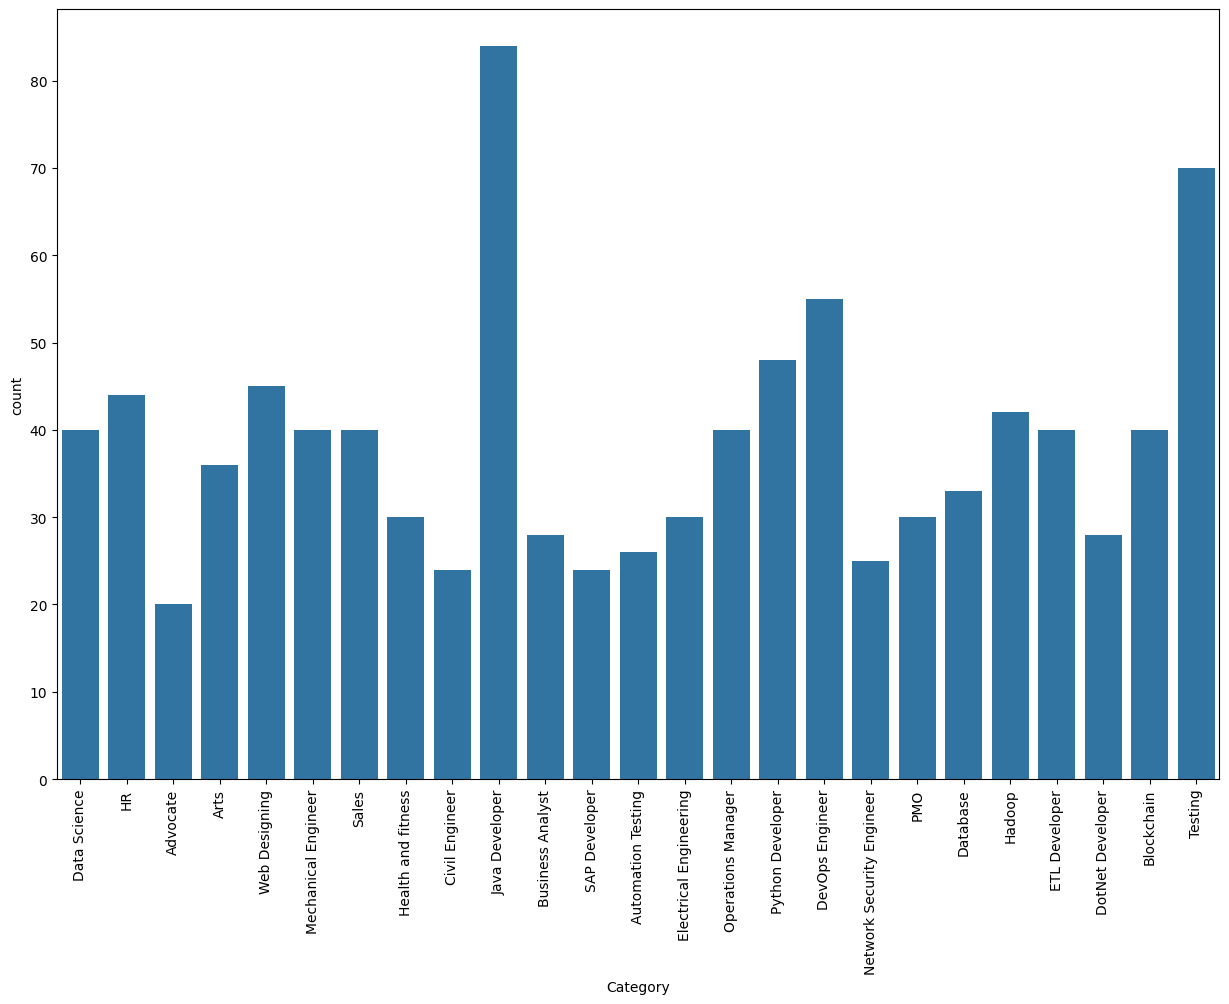

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.show()


In [17]:

df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

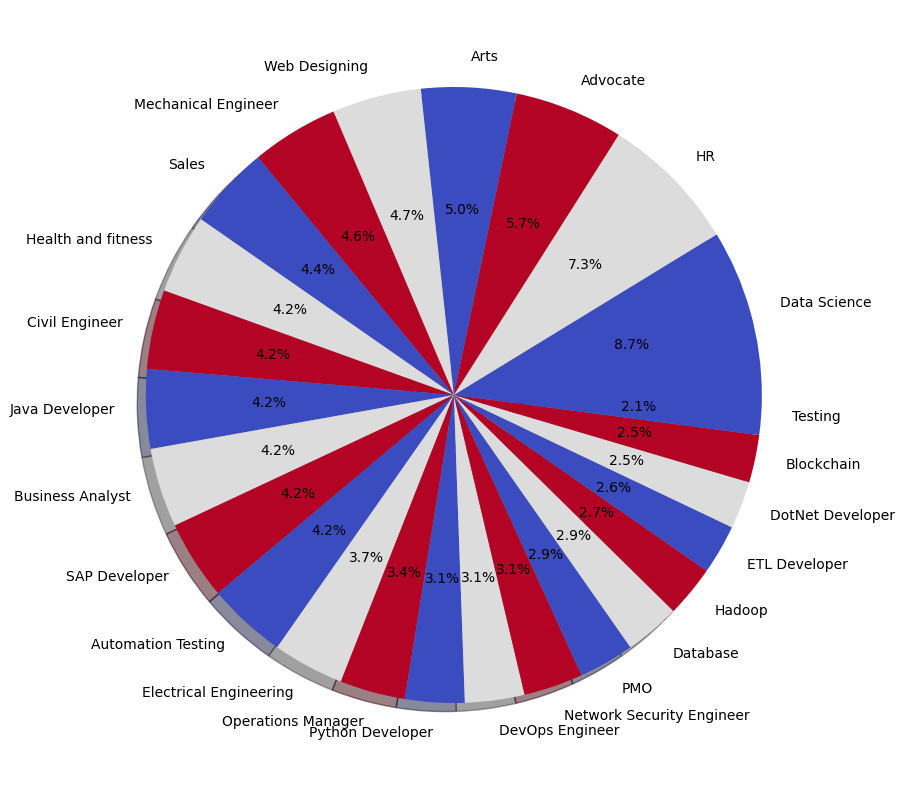

In [18]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15, 10))
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=plt.cm.coolwarm(np.linspace(0, 1, 3)))
plt.show()

exploring resume

In [19]:
df['Category'][0]

'Data Science'

In [20]:
df['Resume'][0]  #give info about resume coloumn

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

Regular Expression-nlp part

In [21]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText #to remove special characters,stopwords in the resume Overall, this function is designed to clean text data typically found in resumes by removing URLs, special characters, non-ASCII characters, and reducing multiple spaces to single spaces.

In [22]:
df['Resume']= df['Resume'].apply(lambda x: cleanResume(x))

In [23]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

words into cateogorical values ,it is supevised learning one input,one output feature

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #apply lable encoding

In [25]:
# Array of categories
categories = ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
              'Mechanical Engineer', 'Sales', 'Health and fitness',
              'Civil Engineer', 'Java Developer', 'Business Analyst',
              'SAP Developer', 'Automation Testing', 'Electrical Engineering',
              'Operations Manager', 'Python Developer', 'DevOps Engineer',
              'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
              'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']

# Initialize LabelEncoder
le = LabelEncoder()

# Fit LabelEncoder on the categories and transform them
encoded_categories = le.fit_transform(categories)

# Create a dictionary to store the mapping between original categories and encoded labels
category_mapping = dict(zip(encoded_categories, categories))

# Apply label encoding to the 'Category' column in your DataFrame
df['Category'] = le.transform(df['Category'])

# Print the mapping between original categories and encoded labels
print("Mapping of original categories to encoded labels:")
for label, category in category_mapping.items():
    print(f"Encoded label {label}: Original category '{category}'")
    le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])
df.Category.unique()

Mapping of original categories to encoded labels:
Encoded label 6: Original category 'Data Science'
Encoded label 12: Original category 'HR'
Encoded label 0: Original category 'Advocate'
Encoded label 1: Original category 'Arts'
Encoded label 24: Original category 'Web Designing'
Encoded label 16: Original category 'Mechanical Engineer'
Encoded label 22: Original category 'Sales'
Encoded label 14: Original category 'Health and fitness'
Encoded label 5: Original category 'Civil Engineer'
Encoded label 15: Original category 'Java Developer'
Encoded label 4: Original category 'Business Analyst'
Encoded label 21: Original category 'SAP Developer'
Encoded label 2: Original category 'Automation Testing'
Encoded label 11: Original category 'Electrical Engineering'
Encoded label 18: Original category 'Operations Manager'
Encoded label 20: Original category 'Python Developer'
Encoded label 8: Original category 'DevOps Engineer'
Encoded label 17: Original category 'Network Security Engineer'
Enc

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [26]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [27]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredTaxt  = tfidf.transform(df['Resume'])

In [32]:
requiredTaxt

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

spliting

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
 X_train, X_test, y_train, y_test = train_test_split(requiredTaxt, df['Category'], test_size=0.2, random_state=42)

In [35]:
X_train.shape  #80% percent here

(769, 7351)

In [36]:
X_test.shape #20% here

(193, 7351)

training the model and print the classification report:

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred)) #y_pred is prediction by model
                              #y_test   20% dATA MODEL HASNT SEEN THE DATA

0.9844559585492227


In [38]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

Prediction System

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredTaxt  = tfidf.transform(df['Resume'])

In [40]:
import pickle
# clf = YourClassifier()  # Assuming YourClassifier is imported and properly set up
clf.fit(X_train, y_train)
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [42]:
import pickle

# Load the TF-IDF vectorizer
with open('tfidf.pkl', 'rb') as f:
    loaded_tfidf = pickle.load(f)

In [43]:
import pickle

# Load the classifier
with open('clf.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)

In [44]:
print(type(loaded_tfidf))
print(type(loaded_clf))

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
<class 'sklearn.multiclass.OneVsRestClassifier'>


In [45]:
# Preprocess your resume text and transform it using the loaded TF-IDF vectorizer
myresume_tfidf = loaded_tfidf.transform([resume1])

In [46]:

# Predict the category of your resume using the loaded classifier
predicted_category = loaded_clf.predict(myresume_tfidf)

In [47]:
# Print the predicted category
print("Predicted Category:", predicted_category[0])


Predicted Category: 6


In [48]:
total_categories = df['Category'].nunique()
print("Total number of categories:", total_categories)



Total number of categories: 25


In [49]:
# Decode the predicted category index to its corresponding class name
predicted_class = category_mapping[predicted_category[0]]

# Print the predicted category
print("Predicted Category:", predicted_category[0])

# Print the predicted class name
print("Category Of Resume:", predicted_class)

Predicted Category: 6
Category Of Resume: Data Science


In [ ]:
import pickle

# Load the TF-IDF vectorizer
with open('tfidf.pkl', 'rb') as f:
    loaded_tfidf = pickle.load(f)
import pickle

# Load the classifier
with open('clf.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)
print(type(loaded_tfidf))
print(type(loaded_clf))
# Preprocess your resume text and transform it using the loaded TF-IDF vectorizer
myresume_tfidf = loaded_tfidf.transform([resume1])

# Predict the category of your resume using the loaded classifier
predicted_category = loaded_clf.predict(myresume_tfidf)
# Decode the predicted category index to its corresponding class name
predicted_class = category_mapping[predicted_category[0]]

# Print the predicted category
print("Predicted Category:", predicted_category[0])

# Print the predicted class name
print("Category Of Resume:", predicted_class)

In [ ]:
resume2 = """
John Doe

Email: john.doe@example.com
Phone: (123) 456-7890
LinkedIn: linkedin.com/in/johndoe
GitHub: github.com/johndoe

SUMMARY
Experienced web developer with a focus on DevOps practices. Proficient in designing, implementing, and maintaining CI/CD pipelines for web applications. Skilled in cloud computing platforms, containerization, and infrastructure automation. Strong background in frontend and backend development.

TECHNICAL SKILLS
- Programming Languages: JavaScript,  Ruby
- Web Development: HTML, CSS, React, Angular, Node.js, Django, Flask
- DevOps Tools: Docker, Kubernetes, Jenkins, Travis CI, GitLab CI/CD, CircleCI
- Cloud Platforms: AWS, Azure, Google Cloud Platform
- Infrastructure as Code: Terraform, CloudFormation
- Version Control: Git, GitHub, GitLab
- Databases: SQL, MongoDB
- Operating Systems: Linux, Unix

EXPERIENCE

ABC Tech Solutions, City, Country
March 2018 - Present

- Designed and implemented CI/CD pipelines for multiple web applications, reducing deployment time by 50%.
- Automated infrastructure provisioning using Terraform, leading to improved scalability and cost-efficiency.
- Managed Docker and Kubernetes clusters to containerize and orchestrate web services across development, staging, and production environments.
- Collaborated with cross-functional teams to optimize application performance, security, and reliability.
- Provided technical support and troubleshooting for web development and DevOps-related issues.


XYZ Web Agency, City, Country
January 2016 - February 2018

- Developed responsive and interactive web applications using modern frontend frameworks such as React and Angular.
- Designed and maintained backend APIs using Node.js, Express.js, and MongoDB.
- Implemented security best practices to protect web applications against common vulnerabilities.
- Optimized website performance and user experience through code refactoring and performance tuning.
- Worked closely with clients to understand requirements and deliver high-quality solutions on time and within budget.

EDUCATION
Bachelor of Science in Computer Science
University of ABC, City, Country
Graduated: May 2015

CERTIFICATIONS
- Certified Kubernetes Administrator (CKA)
- AWS Certified  - Professional

PROJECTS
- GitHub: github.com/johndoe/project1
- GitHub: github.com/johndoe/project2

REFERENCES
Available upon request
"""


In [ ]:
import pickle

# Load the TF-IDF vectorizer
with open('tfidf.pkl', 'rb') as f:
    loaded_tfidf = pickle.load(f)
import pickle

# Load the classifier
with open('clf.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)
print(type(loaded_tfidf))
print(type(loaded_clf))
# Preprocess your resume text and transform it using the loaded TF-IDF vectorizer
myresume_tfidf = loaded_tfidf.transform([resume2])

# Predict the category of your resume using the loaded classifier
predicted_category = loaded_clf.predict(myresume_tfidf)
# Decode the predicted category index to its corresponding class name
predicted_class = category_mapping[predicted_category[0]]

# Print the predicted category
print("Predicted Category:", predicted_category[0])

# Print the predicted class name
print("Category Of Resume:", predicted_class)

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
<class 'sklearn.multiclass.OneVsRestClassifier'>
Predicted Category: 8
Category Of Resume: DevOps Engineer


In [ ]:
resume3 ="""Rajesh Patel

Email: rajesh.patel@example.com
Phone: (123) 456-7890
LinkedIn: linkedin.com/in/rajeshpatel
GitHub: github.com/rajeshpatel

SUMMARY
Experienced blockchain developer with a strong focus on decentralized applications (dApps) and smart contracts. Proficient in designing, implementing, and auditing blockchain solutions. Skilled in blockchain platforms, consensus algorithms, and cryptography. Strong background in both frontend and backend development.

TECHNICAL SKILLS
- Programming Languages: Solidity, JavaScript
- Blockchain Platforms: Ethereum, Hyperledger Fabric, Binance Smart Chain
- Smart Contract Development: Solidity, Truffle, Web3.js
- Decentralized Finance (DeFi): Uniswap, Compound, MakerDAO
- Blockchain Tools: Remix, Ganache, Metamask, Infura
- Cryptography: Encryption, Hashing, Digital Signatures
- Web Development: HTML, CSS, React, Angular, Node.js
- Version Control: Git, GitHub
- Databases: SQL, MongoDB
- Operating Systems: Linux, Unix

EXPERIENCE

ABC Blockchain Solutions, City, Country
March 2018 - Present

- Designed and implemented smart contracts for various decentralized applications, ensuring security, efficiency, and compliance.
- Developed blockchain-based solutions for supply chain management, identity verification, and decentralized finance (DeFi).
- Conducted code audits and security assessments of smart contracts to identify vulnerabilities and ensure best practices.
- Integrated blockchain technology with existing systems and applications to enable seamless data exchange and interoperability.
- Collaborated with cross-functional teams to design and implement consensus mechanisms, governance models, and tokenomics.

XYZ Blockchain Startup, City, Country
January 2016 - February 2018

- Built decentralized applications (dApps) using Ethereum and Hyperledger Fabric, focusing on use cases such as asset tokenization and decentralized exchanges.
- Implemented frontends for dApps using"""


In [ ]:
import pickle

# Load the TF-IDF vectorizer
with open('tfidf.pkl', 'rb') as f:
    loaded_tfidf = pickle.load(f)
import pickle

# Load the classifier
with open('clf.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)
print(type(loaded_tfidf))
print(type(loaded_clf))
# Preprocess your resume text and transform it using the loaded TF-IDF vectorizer
myresume_tfidf = loaded_tfidf.transform([resume3])

# Predict the category of your resume using the loaded classifier
predicted_category = loaded_clf.predict(myresume_tfidf)
# Decode the predicted category index to its corresponding class name
predicted_class = category_mapping[predicted_category[0]]

# Print the predicted category
print("Predicted Category:", predicted_category[0])

# Print the predicted class name
print("Category Of Resume:", predicted_class)

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
<class 'sklearn.multiclass.OneVsRestClassifier'>
Predicted Category: 3
Category Of Resume: Blockchain


In [ ]:
resume4="""Alex Johnson

Email: alex.johnson@example.com
Phone: (123) 456-7890
LinkedIn: linkedin.com/in/alexjohnson
GitHub: github.com/alexjohnson

SUMMARY
Motivated mechanical engineer with a strong background in design, analysis, and project management. Proficient in utilizing CAD software and simulation tools to develop innovative solutions for complex engineering challenges. Experienced in product development, manufacturing processes, and quality assurance. Excellent problem-solving skills and a passion for continuous learning and professional growth.

TECHNICAL SKILLS

Computer-Aided Design (CAD): SolidWorks, AutoCAD, CATIA
Finite Element Analysis (FEA): ANSYS, Abaqus
Engineering Software: MATLAB, Simulink
Product Lifecycle Management (PLM): Teamcenter, PTC Windchill
Manufacturing Processes: CNC Machining, Injection Molding, 3D Printing
Quality Management Systems: ISO 9001, Six Sigma
Mechanical Testing and Analysis
Project Management Tools: Microsoft Project, JIRA
EXPERIENCE

ABC Engineering Company, City, Country
March 2018 - Present

Led a cross-functional team in the design and development of a new product line, from concept generation to manufacturing, resulting in a 20% increase in revenue.
Conducted structural and thermal analyses using FEA software to optimize component designs for strength, durability, and performance.
Collaborated with manufacturing engineers to implement cost-effective production methods and improve manufacturing efficiency.
Implemented quality control measures and conducted failure analysis to identify and address root causes of product defects, reducing rejection rates by 15%.
Managed project schedules, budgets, and resources to ensure on-time delivery and adherence to project milestones.
XYZ Automotive Corporation, City, Country
January 2016 - February 2018

Designed and validated automotive components and systems using CAD software and simulation tools, meeting industry standards and customer requirements.
Supported prototype testing and validation activities, analyzing test data and making design modifications as necessary to improve product performance and reliability.
Participated in design reviews and cross-functional meetings to coordinate design changes and resolve engineering issues in a timely manner.
Developed technical documentation, including engineering drawings, specifications, and test reports, to communicate design intent and requirements to internal teams and suppliers.
Contributed to continuous improvement initiatives, implementing design optimizations and process improvements to enhance product quality and reduce manufacturing costs.
EDUCATION
Bachelor of Science in Mechanical Engineering
University of ABC, City, Country
Graduated: May 2015

CERTIFICATIONS

Professional Engineer (PE) License
Six Sigma Green Belt Certification
PROJECTS

GitHub: github.com/alexjohnson/engineering-project1
GitHub: github.com/alexjohnson/engineering-project2
REFERENCES
Available upon request"""

In [ ]:
import pickle

# Load the TF-IDF vectorizer
with open('tfidf.pkl', 'rb') as f:
    loaded_tfidf = pickle.load(f)
import pickle

# Load the classifier
with open('clf.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)
print(type(loaded_tfidf))
print(type(loaded_clf))
# Preprocess your resume text and transform it using the loaded TF-IDF vectorizer
myresume_tfidf = loaded_tfidf.transform([resume4])

# Predict the category of your resume using the loaded classifier
predicted_category = loaded_clf.predict(myresume_tfidf)
# Decode the predicted category index to its corresponding class name
predicted_class = category_mapping[predicted_category[0]]

# Print the predicted category
print("Predicted Category:", predicted_category[0])

# Print the predicted class name
print("Category Of Resume:", predicted_class)

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
<class 'sklearn.multiclass.OneVsRestClassifier'>
Predicted Category: 16
Category Of Resume: Mechanical Engineer


In [ ]:
resume5="""Elena Harper

Email: elena.harper@example.com
Phone: (123) 456-7890
LinkedIn: linkedin.com/in/elenaharper
GitHub: github.com/elenaharper

SUMMARY
A seeker of truths, navigating the labyrinth of justice with a quill and compass. Master of decoding the arcane scripts of law into symphonies of change. A weaver of shadows, whispering to stars and stones alike, forging alliances in the mists of ambiguity. Champion of the silenced, sculpting whispers into roars that echo through the corridors of power.

PROFESSIONAL SKILLS

Esoteric Legal Lore
Strategic Alchemy and Advocacy
Conjuring Media Enchantments
Weaving Threads of Unity
Architect of Policy Realms
Sentinel of Diversity Realities
Symphony Maestro in Discord
Diplomat of Mystical Negotiations
EXPERIENCE

VeilGuardian, City, Country
March 2018 - Present

Delved deep into the cryptic texts of law, distilling elixirs of truth to ignite the embers of change.
Wielded the ethereal forces of strategy to transmute dreams of justice into tangible realities.
Summoned storms of media enchantments to cast a spell of awareness upon the lands.
Wove a tapestry of unity, bridging realms and forging alliances among disparate souls.
Crafted and enchanted the pillars of policy realms, shaping destinies with every incantation.
CelestialRights, City, Country
January 2016 - February 2018

Embarked on odysseys through realms of injustice, wielding the sword of advocacy to vanquish shadows.
Whispered secrets of empowerment to the downtrodden, igniting flames of revolution in their hearts.
Conjured apparitions of awareness, haunting the chambers of power with the echoes of truth.
Danced among the stars, orchestrating cosmic symphonies of change in the celestial courts.
Ascended to the zenith of enlightenment, wielding the scepter of diplomacy in negotiations with celestial beings.
EDUCATION
Juris Doctor (JD)
Mystic University, City, Country
Graduated: May 2015

CERTIFICATIONS

Guardian of the Veil
Celestial Advocate
PROJECTS

GitHub: github.com/elenaharper/enigmatic-project1
GitHub: github.com/elenaharper/enigmatic-project2"""

In [ ]:
import pickle

# Load the TF-IDF vectorizer
with open('tfidf.pkl', 'rb') as f:
    loaded_tfidf = pickle.load(f)
import pickle

# Load the classifier
with open('clf.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)
print(type(loaded_tfidf))
print(type(loaded_clf))
# Preprocess your resume text and transform it using the loaded TF-IDF vectorizer
myresume_tfidf = loaded_tfidf.transform([resume5])

# Predict the category of your resume using the loaded classifier
predicted_category = loaded_clf.predict(myresume_tfidf)
# Decode the predicted category index to its corresponding class name
predicted_class = category_mapping[predicted_category[0]]

# Print the predicted category
print("Predicted Category:", predicted_category[0])

# Print the predicted class name
print("Category Of Resume:", predicted_class)

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
<class 'sklearn.multiclass.OneVsRestClassifier'>
Predicted Category: 0
Category Of Resume: Advocate
